In [1]:
#https://pypi.org/project/bezier/
#https://gis.stackexchange.com/questions/340319/how-to-draw-two-or-multiple-lines-from-one-location-to-another-without-overlappi
#https://gis.stackexchange.com/questions/258076/how-to-generate-wkt-geometries-from-true-type-font-glyphs-python
#https://stackoverflow.com/questions/39072794/how-to-draw-a-fonts-glyphs-using-svg
#https://opentype.js.org/glyph-inspector.html
#https://nekin.info/prog/primo.html

In [2]:
def f_load(dframe):
    bezier_curvies =[]
    
    total_rows = len(dframe)
    #print("total_rows",total_rows)
    
    node =[]
    for i in range(total_rows):
        x,y,glif = dframe.loc[i]
        #print(i,x,y,glif)
        if glif == "on":
            if len(node)>0:
                node.append([x,y,glif])
                bezier_curvies.append(node)
                node =[]
                node.append([x,y,glif])
            else:
                node.append([x,y,glif])
        else: #glif == "off":
            if len(node)>0:
                node.append([x,y,glif])
    if len(node) > 1:
        #print("\n",len(node),node)
        for i in range(total_rows):
            x,y,glif = dframe.loc[i]
            #print(i,x,y,glif)
            node.append([x,y,glif])
            if glif == "on":
                bezier_curvies.append(node)
                break
    return bezier_curvies
'''
def f_create_bezier_curvies(curvies_list):
    curves = []
    for curv in curvies_list:
        x_tmp = []
        y_tmp = []
        for i in range(len(curv)):
            x_tmp.append(curv[i][0])
            y_tmp.append(curv[i][1])
        nodes_tmp = numpy.asfortranarray([x_tmp, y_tmp])
        curve = bezier.Curve(nodes_tmp, degree=(len(curv)-1) )
        #curve.plot(100, color='r', alpha=None, ax=ax)
        curves.append(bezier.Curve(nodes_tmp, degree=(len(curv)-1) ))
    return curves
'''
def f_create_bezier_curvies(curvies_list_array):
    curves = []
    for curvies_list in curvies_list_array:
        for curv in curvies_list:
            x_tmp = []
            y_tmp = []
            for i in range(len(curv)):
                x_tmp.append(curv[i][0])
                y_tmp.append(curv[i][1])
            nodes_tmp = numpy.asfortranarray([x_tmp, y_tmp])
            curve = bezier.Curve(nodes_tmp, degree=(len(curv)-1) )
            #curve.plot(100, color='r', alpha=None, ax=ax)
            curves.append(bezier.Curve(nodes_tmp, degree=(len(curv)-1) ))
    return curves

def plt_view_grid(plt, axis ='off',
                  xy_sizeaxis =None,
                  xy_measuare =None,
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    if xy_sizeaxis is None:  x_min=-10; x_max=10; y_min=-10; y_max=10;
    else: x_min, x_max, y_min, y_max = xy_sizeaxis

    if xy_measuare is None:  x_major_size=1; x_minor_size=0.2; y_major_size=1; y_minor_size=0.2;
    else: x_major_size, x_minor_size, y_major_size, y_minor_size = xy_measuare
        
    plt.xlim(x_min, x_max); plt.ylim(y_min, y_max);
    ax = plt.gca()
    x_major_ticks=np.arange(x_min,x_max,x_major_size); x_minor_ticks=np.arange(x_min,x_max,x_minor_size)
    y_major_ticks=np.arange(y_min,y_max,y_major_size); y_minor_ticks=np.arange(y_min,y_max,y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


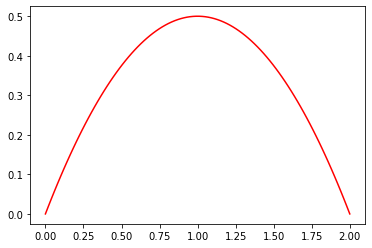

In [3]:
import bezier
import numpy
#import matplotlib #.pyplot as plt
import matplotlib.pyplot as plt

%matplotlib auto
%pylab inline

x1 = [0.0, 1.0, 2.0]
y1 = [0.0, 1.0, 0.0]

nodes1 = numpy.asfortranarray([x1, y1])

curve1 = bezier.Curve(nodes1, degree=2)
ax = curve1.plot(100, color='r', alpha=None, ax=None)


In [4]:
import csv
import numpy as np
import pandas as pd


df = pd.read_csv('data/u0433.csv', delimiter=',')
for ithem in df:
    print(ithem)
print(df.head())
print(df.head()[df.GLIF == 'on'])
print(df[df.GLIF == 'on'].head())
print(df[df.GLIF == 'on'][0:5])

X
Y
GLIF
     X    Y GLIF
0  179  400   on
1  179  409  off
2  191  421  off
3  200  421   on
4  235  421  off
     X    Y GLIF
0  179  400   on
3  200  421   on
      X    Y GLIF
0   179  400   on
3   200  421   on
6   280  383   on
9   269  241   on
10  206  116   on
      X    Y GLIF
0   179  400   on
3   200  421   on
6   280  383   on
9   269  241   on
10  206  116   on


<ipython-input-4-45a0140a4909>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df.head()[df.GLIF == 'on'])


In [5]:
bezier_curvies = f_load(df)
for i in range(len(bezier_curvies)):
    print(bezier_curvies[i])

[[179, 400, 'on'], [179, 409, 'off'], [191, 421, 'off'], [200, 421, 'on']]
[[200, 421, 'on'], [235, 421, 'off'], [272, 396, 'off'], [280, 383, 'on']]
[[280, 383, 'on'], [296, 357, 'off'], [290, 283, 'off'], [269, 241, 'on']]
[[269, 241, 'on'], [206, 116, 'on']]
[[206, 116, 'on'], [203, 109, 'off'], [195, 86, 'off'], [190, 62, 'off'], [189, 39, 'off'], [194, 32, 'on']]
[[194, 32, 'on'], [200, 21, 'off'], [225, 21, 'on']]
[[225, 21, 'on'], [234, 21, 'off'], [246, 9, 'off'], [246, 0, 'on']]
[[246, 0, 'on'], [246, -9, 'off'], [234, -21, 'off'], [225, -21, 'on']]
[[225, -21, 'on'], [195, -21, 'off'], [165, -1, 'off'], [158, 10, 'on']]
[[158, 10, 'on'], [147, 27, 'off'], [147, 68, 'off'], [156, 104, 'off'], [167, 131, 'off'], [169, 134, 'on']]
[[169, 134, 'on'], [231, 259, 'on']]
[[231, 259, 'on'], [247, 291, 'off'], [254, 345, 'off'], [244, 360, 'on']]
[[244, 360, 'on'], [232, 379, 'off'], [200, 379, 'on']]
[[200, 379, 'on'], [191, 379, 'off'], [179, 391, 'off'], [179, 400, 'on']]


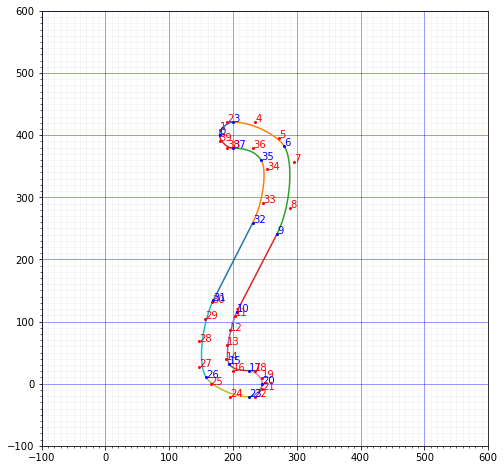

In [6]:
curves = f_create_bezier_curvies([bezier_curvies])

plt.figure(figsize=(8,8))
plt_view_grid(plt, 'on',(-100,600,-100,600),(100,10,100,10),major_color='b')
ax = plt.gca()

for k in curves:
    k.plot(100, ax=ax)
    
for i in range(len(df)):
    x,y,glif = df.loc[i]
    if glif == "on":
        plt.text(x, y, str(i), color="blue", fontsize=10)
        plt.plot(x, y, marker=".", color='blue', markersize=4)
    else:
        plt.text(x, y, str(i), color="red", fontsize=10)
        plt.plot(x, y, marker=".", color="red", markersize=4)

plt.show()

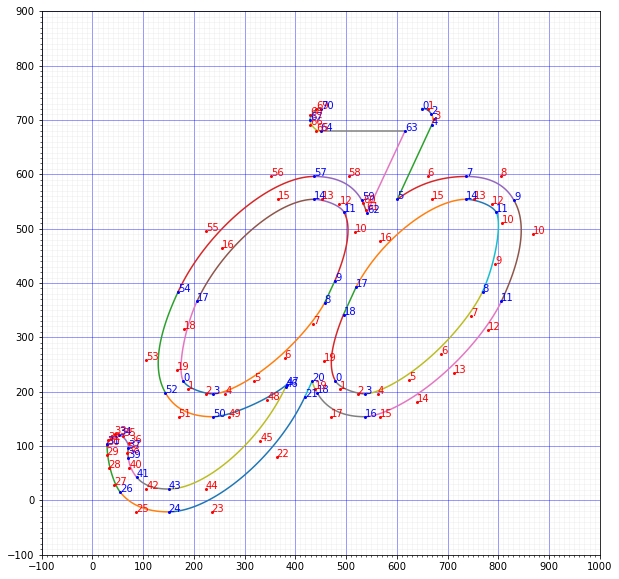

In [7]:
df_1 = pd.read_csv('data/u0424_1.csv', delimiter=',')
df_2 = pd.read_csv('data/u0424_2.csv', delimiter=',')
df_3 = pd.read_csv('data/u0424_3.csv', delimiter=',')

bezier_curvies_1 = f_load(df_1)
bezier_curvies_2 = f_load(df_2)
bezier_curvies_3 = f_load(df_3)

curves = f_create_bezier_curvies([bezier_curvies_1,bezier_curvies_2,bezier_curvies_3])

plt.figure(figsize=(10,10))
plt_view_grid(plt, 'on',(-100,1000,-100,900),(100,10,100,10),major_color='b')
ax = plt.gca()

for k in curves:
    k.plot(100, ax=ax)

for df_tmp in [df_1,df_2,df_3]:
    for i in range(len(df_tmp)):
        x,y,glif = df_tmp.loc[i]
        if glif == "on":
            plt.text(x, y, str(i), color="blue", fontsize=10)
            plt.plot(x, y, marker=".", color='blue', markersize=4)
        else:
            plt.text(x, y, str(i), color="red", fontsize=10)
            plt.plot(x, y, marker=".", color="red", markersize=4)
plt.show()

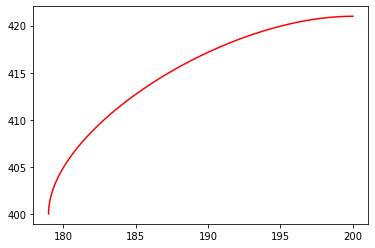

In [8]:
x2 = [179,179,191,200]#,235,272,280,296,290,269,206,203,195,190,189,194,200,225,234,246,246,246,234,225,195,165,158,147,147,156,167,169,231,247,254,244,232,200,191,179]
y2 = [400,409,421,421]#,421,396,383,357,283,241,116,109, 86, 62, 39, 32, 21, 21, 21,  9,  0, -9,-21,-21,-21, -1, 10, 27, 68,104,131,134,259,291,345,360,379,379,379,391]

x3 = [179,179,191,200,235,272,280,296,290,269,206,203,195,190,189,194,200,225,234,246,246,246,234,225,195,165,158,147,147,156,167,169,231,247,254,244,232,200,191,179]
y3 = [400,409,421,421,421,396,383,357,283,241,116,109, 86, 62, 39, 32, 21, 21, 21,  9,  0, -9,-21,-21,-21, -1, 10, 27, 68,104,131,134,259,291,345,360,379,379,379,391]

nodes2 = numpy.asfortranarray([x2, y2])
curve2 = bezier.Curve(nodes2, degree=3)

curve2.plot(1000,color='g', alpha=None, ax=ax)
ax = curve2.plot(1000, color='r', alpha=None, ax=None)

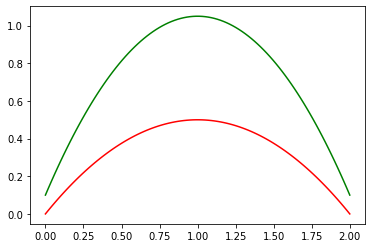

In [9]:
import bezier
import numpy
import matplotlib

x1 = [0.0, 1.0, 2.0]
y1 = [0.0, 1.0, 0.0]

x2 = [0.0, 1.0, 2.0]
y2 = [0.1, 2.0, 0.1]

nodes1 = numpy.asfortranarray([x1, y1])
nodes2 = numpy.asfortranarray([x2, y2])

curve1 = bezier.Curve(nodes1, degree=2)
ax = curve1.plot(100, color='r', alpha=None, ax=None)

curve2 = bezier.Curve(nodes2, degree=2)
curve2.plot(100, color='g', alpha=None, ax=ax)

In [10]:
from shapely.geometry import Polygon
from ttfquery import describe
from ttfquery import glyphquery
import ttfquery.glyph as glyph
char = "a"
font_url ="arial.ttf"
font = describe.openFont(font_url)
g = glyph.Glyph(char) 

ModuleNotFoundError: No module named 'shapely'